<a href="https://colab.research.google.com/github/Tushy12/malaria/blob/main/Malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.image import imread

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data_dir = '/content/drive/MyDrive/cell_images'

parasite_tpath = data_dir+'/train/parasitized/'
uninfected_tpath = data_dir+'/train/uninfected/'

parasite_path = data_dir+'/test/parasitized/'
uninfected_path = data_dir+'/test/uninfected/'

In [ ]:
import os

In [ ]:
cell1 = os.listdir(uninfected_tpath)[0]

In [ ]:
cell1

'C93P54ThinF_IMG_20150821_163815_cell_132.png'

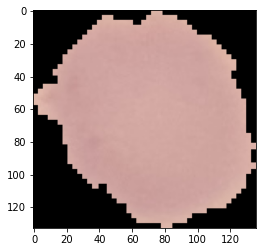

In [ ]:
plt.imshow(imread(uninfected_tpath+cell1))

In [ ]:
imread(uninfected_tpath+cell1).shape

(133, 136, 3)

In [ ]:
print (len(os.listdir(parasite_tpath)),len(os.listdir(uninfected_tpath)))

12480 12486


In [ ]:
print (len(os.listdir(parasite_path)),len(os.listdir(uninfected_path)))

1300 1300


#### Since the dimensions of the provided images may not be same, thus 

In [ ]:
dim1 = []
dim2 = []

for image_filename in os.listdir(uninfected_path):

  img = imread(uninfected_path+image_filename)
  d1, d2, colors = img.shape
  dim1.append(d1)
  dim2.append(d2)

In [ ]:
dim1  ## Here we can see that all images are of different dimensions

[115,
 136,
 142,
 163,
 175,
 127,
 172,
 133,
 130,
 136,
 115,
 106,
 115,
 130,
 154,
 106,
 145,
 166,
 142,
 136,
 124,
 124,
 142,
 124,
 142,
 124,
 142,
 151,
 136,
 115,
 118,
 145,
 145,
 112,
 109,
 118,
 118,
 121,
 136,
 109,
 121,
 124,
 127,
 109,
 175,
 118,
 106,
 109,
 97,
 124,
 127,
 130,
 103,
 124,
 127,
 118,
 115,
 109,
 91,
 139,
 94,
 130,
 112,
 121,
 130,
 106,
 136,
 103,
 121,
 97,
 127,
 121,
 118,
 100,
 133,
 157,
 130,
 112,
 106,
 109,
 109,
 127,
 115,
 133,
 121,
 142,
 175,
 115,
 106,
 118,
 127,
 133,
 127,
 109,
 124,
 97,
 151,
 127,
 106,
 133,
 130,
 112,
 103,
 166,
 85,
 127,
 124,
 127,
 106,
 121,
 115,
 130,
 172,
 124,
 124,
 133,
 115,
 118,
 112,
 124,
 124,
 130,
 121,
 136,
 142,
 145,
 118,
 145,
 130,
 109,
 124,
 127,
 121,
 127,
 118,
 130,
 97,
 103,
 127,
 130,
 130,
 91,
 118,
 136,
 118,
 115,
 97,
 124,
 127,
 130,
 130,
 112,
 100,
 127,
 139,
 112,
 154,
 127,
 133,
 103,
 124,
 145,
 148,
 124,
 121,
 133,
 106,
 106,
 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


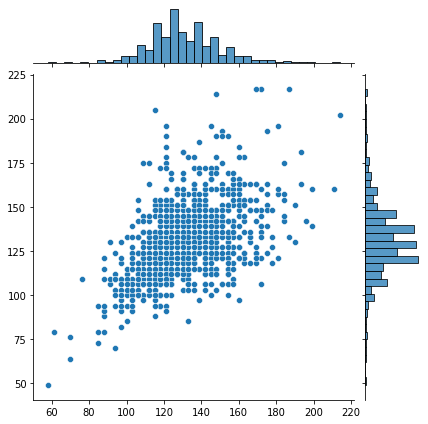

In [ ]:
sns.jointplot(dim1,dim2)

In [ ]:
print(np.mean(dim1),np.mean(dim2))

130.92538461538462 130.75


In [ ]:
image_shape = (130,130,3)

### Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##### As the images provided to us my still be restrictive, we randomly flip,rotate, expand etc the image to increase our chances of detection.
##### The random image generator arguments are dependent on the nature of image.

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest',)

In [ ]:
image_gen.flow_from_directory(data_dir+'/train/')

Found 24964 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(data_dir+'/test/')

Found 2600 images belonging to 2 classes.


### Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
train_image_gen = image_gen.flow_from_directory(data_dir+'/train/',target_size=image_shape[:2],
                              color_mode='rgb', batch_size=16,
                              class_mode='binary')

Found 24964 images belonging to 2 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(data_dir+'/test/',target_size=image_shape[:2],
                              color_mode='rgb', batch_size=16,
                              class_mode='binary', shuffle=False)

Found 2600 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
results = model.fit(train_image_gen,epochs=20,
                    validation_data=test_image_gen,
                    callbacks=[early_stop])

Epoch 1/20
1561/1561 [==============================] - 842s 539ms/step - loss: 1.1057 - accuracy: 0.5449 - val_loss: 0.6851 - val_accuracy: 0.5596
Epoch 2/20
1561/1561 [==============================] - 837s 536ms/step - loss: 0.6809 - accuracy: 0.5723 - val_loss: 0.6759 - val_accuracy: 0.5750
Epoch 3/20
1561/1561 [==============================] - 834s 534ms/step - loss: 0.6766 - accuracy: 0.5826 - val_loss: 0.6753 - val_accuracy: 0.5969
Epoch 4/20
1561/1561 [==============================] - 833s 534ms/step - loss: 0.6750 - accuracy: 0.5921 - val_loss: 0.6646 - val_accuracy: 0.6065
Epoch 5/20
1561/1561 [==============================] - 828s 530ms/step - loss: 0.4484 - accuracy: 0.7821 - val_loss: 0.2581 - val_accuracy: 0.9162
Epoch 6/20
1561/1561 [==============================] - 823s 527ms/step - loss: 0.2045 - accuracy: 0.9378 - val_loss: 0.1674 - val_accuracy: 0.9446
Epoch 7/20
1561/1561 [==============================] - 821s 526ms/step - loss: 0.1800 - accuracy: 0.9448 - val_

In [ ]:
model.evaluate(test_image_gen)

163/163 [==============================] - 33s 205ms/step - loss: 0.1644 - accuracy: 0.9438


[0.16444307565689087, 0.9438461661338806]

In [ ]:
pred = (model.predict(test_image_gen))>0.5

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('malaria_detector.h5')

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(test_image_gen.classes,pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1300
           1       0.93      0.95      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [ ]:
print(confusion_matrix(test_image_gen.classes,pred))

[[1212   88]
 [  62 1238]]


In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
para_cell = parasite_tpath+os.listdir(parasite_tpath)[0]
para_cell

'/content/drive/MyDrive/cell_images/train/parasitized/C99P60ThinF_IMG_20150918_141857_cell_50.png'

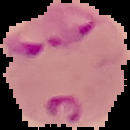

In [ ]:
my_image = image.load_img(para_cell,target_size=image_shape)
my_image

In [ ]:
my_img_arr = image.img_to_array(my_image)
my_img_arr.shape

(130, 130, 3)

In [ ]:
# Because the image array should be (1,130,130,3)
my_img_arr = np.expand_dims(my_img_arr,axis=0)

In [ ]:
my_img_arr.shape

(1, 130, 130, 3)

In [ ]:
model.predict(my_img_arr)>0.5

array([[False]])

In [ ]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

## Thus it shows that since '0' indicates a paracitic cell our prediction is accurate.